# Retorno e Volatilidade
## Retornos
São as variações relativas de um ativo financeiro durante um período de tempo, pode ser negativo ou positivo. É uma medida livre de escala e permite comparar dois ou mais ativos.

### Tipos de Retornos
#### Aritméticos ou Simples
É definido como a diferença entre os preços dividido pelo preço anterior:
\begin{equation*}
R_i = \frac{P_{t} - P_{t-1}}{P_{t-1}}
\end{equation*}
Pode ser diário, semanal, mensal, etc...

#### Continuamente compostos ou Logarítmicos
É definido como o logarítmo natural da razão entre os preços:
\begin{equation*}
r_{i} = \ln({\dfrac{P_{t}}{P_{t-1}}})
\end{equation*}

Equivalente a:
\begin{equation*}
r_{i} = \ln({P_{t}}) - \ln({P_{t-1}})
\end{equation*}
É a soma dos retornos compostos de um período.

### Tipos de Risco
#### Risco de crédito
Associado a possibilidade de que a contraparte não cumpra com as obrigações.
#### Risco de mercado
Associado ao risco das variáveis de mercado como as taxas de interesse ou taxas de câmbio.
#### Risco de liquidez
Associado ao risco de não contar com os recursos monetários para cumprir com as obrigações.
#### Risco operacional
Associado a percas por falhas na operação de negócios, sejam elas internas ou externas.

### Risco financeiro
Definido como qualquer desvio que se apresenta nos retornos esperados de um investimento.

A **volatidade** ou **desvio padrão** dos retornos do prreço pode ser vista como uma primeira medida de risco.
#### Quantificando a volatidade
##### Geral
Para definir a volatilidade podemos utilizar a variância e o desvio padrão dos retornos, definida como:
\begin{equation*}
Var(r) = E[(r - E([r])^2]
\end{equation*}
Por outro, o desvio padrão pode ser definido como:
\begin{equation*}
\sigma = \sqrt{Var(r)}
\end{equation*}
##### Histórica
A variância é definida por:
\begin{equation*}
\sigma_{t}^2 = \frac{1}{N-1}\sum(r_{i} - \overline{r})^2
\end{equation*}
Por último, a volatidade histórica é:
\begin{equation*}
\sigma_{t} = \sqrt{\sigma_{t}^2}
\end{equation*}



In [14]:
# pip install pytz
# pip install yfinance

In [16]:
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import pytz

In [61]:
df = yfin.download('AAPL', start = '2019-01-01', end = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


## Retornos aritméticos

In [46]:
# é necessário definir o preço anterior, para isso usamos o método shift
df['Adj Close t-1'] = df['Adj Close'].shift(1)
df['Returns'] = (df['Adj Close'] - df['Adj Close t-1'])/df['Adj Close']
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,Log Returns
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994488,148158800,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209969,365248800,37.994488,-0.110626,-0.104924
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670364,234428400,34.209969,0.040941,0.041803
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590961,219111200,35.670364,-0.002231,-0.002229
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269436,164101200,35.590961,0.018707,0.018884
...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.025925,54930100,129.030792,0.007653,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.676407,124486200,130.025925,0.034531,0.035141
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.883179,121047300,134.676407,-0.013495,-0.013405


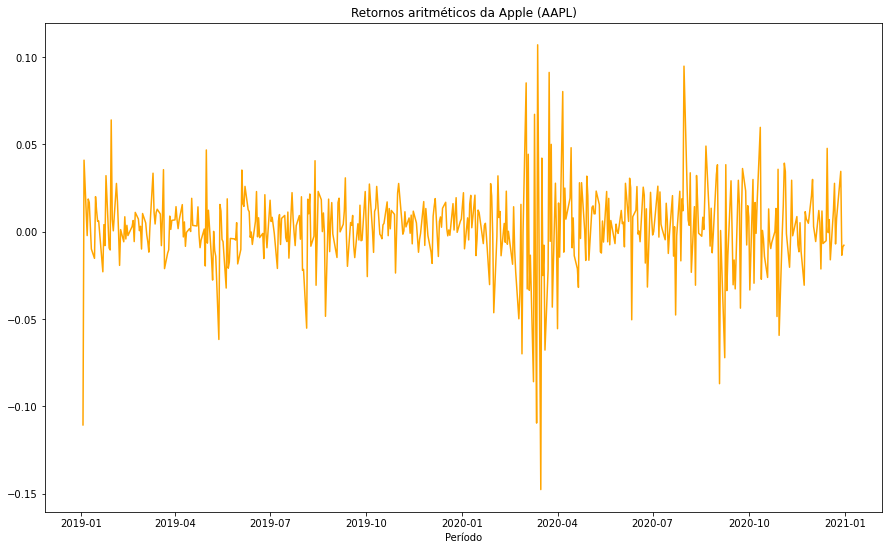

In [50]:
# df['Returns'].plot()
plt.figure(figsize = (15, 9))
plt.plot(df['Returns'], color = 'orange')
plt.title('Retornos aritméticos da Apple (AAPL)')
plt.xlabel('Período')
plt.show()

## Retornos logarítmicos

In [51]:
df['Log Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close t-1'])
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,Log Returns
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.994488,148158800,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.209969,365248800,37.994488,-0.110626,-0.104924
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.670364,234428400,34.209969,0.040941,0.041803
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.590961,219111200,35.670364,-0.002231,-0.002229
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.269436,164101200,35.590961,0.018707,0.018884
...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.025925,54930100,129.030792,0.007653,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.676407,124486200,130.025925,0.034531,0.035141
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.883179,121047300,134.676407,-0.013495,-0.013405


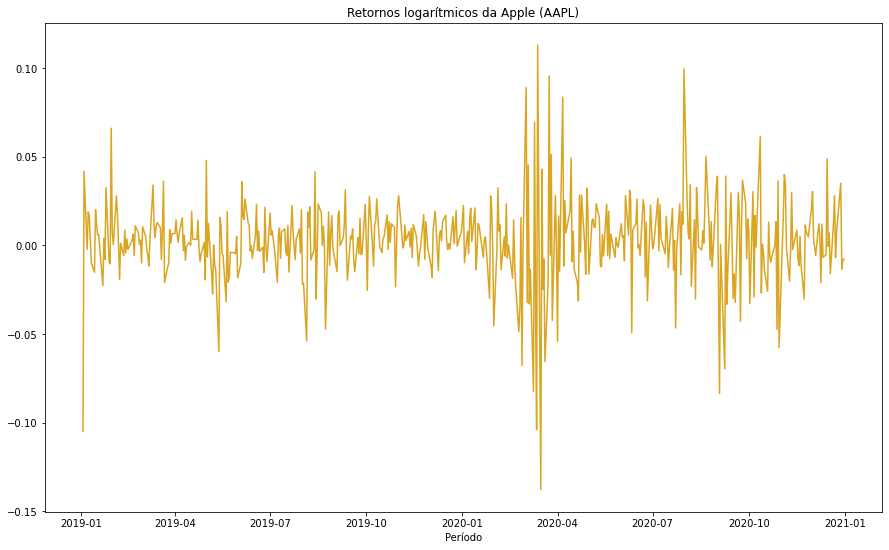

In [54]:
# df['Log Returns'].plot()
plt.figure(figsize = (15, 9))
plt.plot(df['Log Returns'], color = 'goldenrod')
plt.title('Retornos logarítmicos da Apple (AAPL)')
plt.xlabel('Período')
plt.show()

### Volatilidade

In [57]:
# Volatilidade diária
vol_d = np.std(df['Log Returns'])

# Volatilidade diária anualizada
vol_a = vol_d * np.sqrt(252)
vol_a

0.3786474839878589

In [69]:
# Códigos para o questionário avaliativo
quest = yfin.download('^GSPC', start = '2015-01-01', end = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [87]:
quest['Adj Close t-1'] = quest['Adj Close'].shift(1)
quest['Returns'] = (quest['Adj Close'] - quest['Adj Close t-1'])/quest['Adj Close t-1']
quest['Log Returns'] = np.log(quest['Adj Close']) - np.log(quest['Adj Close t-1'])

questRetLogDia = np.mean(quest['Log Returns'])
questRetLogAnual = questRetLogDia * 252

questRetAritDia = np.mean(quest['Returns'])
questRetAritAnual = questRetAritDia * 252

questVolAritDia = np.std(quest['Returns'])
questVolAritAnual = questVolAritDia * np.sqrt(252)

questVolLogDia = np.std(quest['Log Returns'])
questVolLogAnual = questVolLogDia * np.sqrt(252)
questVolLogAnual


0.18750097813696626